<a href="https://colab.research.google.com/github/kota-Git/Credit_card_Default_prediction_capstone_project-3/blob/main/2_Credit_Card_Default_Prediction_Capstone_Project_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
# importing liabraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# importing drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.__version__


'1.3.5'

In [ ]:
pip install --upgrade xlrd

In [ ]:

dataset=pd.read_excel("/content/drive/MyDrive/Credit_card_Default_prediction_capstone_project-3-pro-  KOTA LAKSHAMNA RAO/default of credit card clients.xls",header=1)

In [ ]:

# looking first 5 rows
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# looking last 5 rows
dataset.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


**Understanding of data**

In [ ]:
dataset.describe(include="all")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:

dataset.shape

(30000, 25)

In [ ]:
# checking dataset having null values or not
dataset.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In the  given data set don't have any null values 

In [ ]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

**EDA**

**Dependent variable**

In [ ]:
dataset.rename(columns={'default payment next month' : 'Defaulter'}, inplace=True)

In [ ]:
dataset['Defaulter'].value_counts()

0    23364
1     6636
Name: Defaulter, dtype: int64

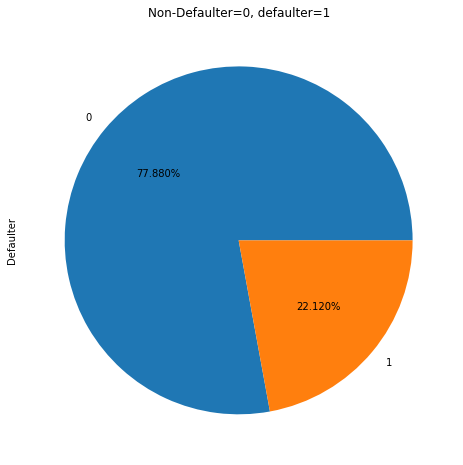

In [ ]:
dataset['Defaulter'].value_counts().plot(kind="pie",autopct='%1.3f%%',figsize=(8,8))
plt.title("Non-Defaulter=0, defaulter=1")
plt.show()

from the above data we can conclude that
1. Non-defaulter were 23364, Defaulter were 6636

2.the above pie charts said Non-defaulters 77.88% ,and defaulter were
22.12% 



**Independent variables**

**Credit limit balance**

In [ ]:
dataset['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64

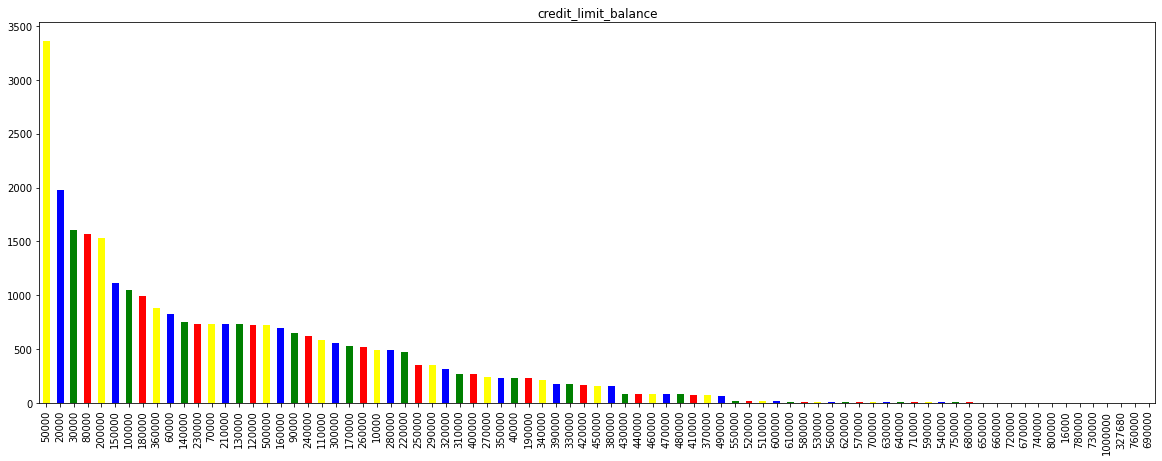

In [ ]:
plt.figure(figsize=(20,7))
dataset['LIMIT_BAL'].value_counts().plot(kind="bar",color={"blue","green","red","yellow"})
plt.title("credit_limit_balance")
plt.show()

In [ ]:
dataset['LIMIT_BAL'].max()

1000000

In [ ]:
dataset['LIMIT_BAL'].min()

10000

from the above data we can conclude that most of people available credit balance is 50,000 to 3365 members 

maximum  available credit balance limit is 1,00,000

minimum available credit balance limit is 10,000

**SEX**

Male-1

Female-2

In [ ]:
dataset['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

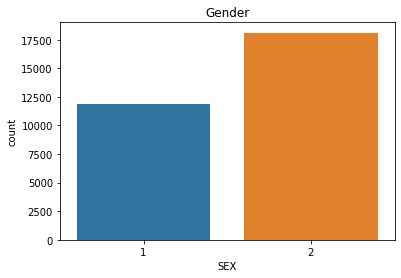

In [ ]:
sb.countplot(dataset['SEX'])
plt.title("Gender")
plt.show()

from the above data we can conclude that male are 11,888 represented as 1  and female are 18,112 represented as 2

**Education**



1 = graduate school,

2 = university,

3 = high school,

 0 = others

In [ ]:
dataset['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In descption of dataset said except 1,2,3 any other number taken count as 0 so in our data of education others data also available number as 4,5,6 so all this numbers convert into as 0 only

In [ ]:
dataset["EDUCATION"]=dataset["EDUCATION"].replace({4:0,5:0,6:0})

In [ ]:
dataset["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

<function matplotlib.pyplot.show>

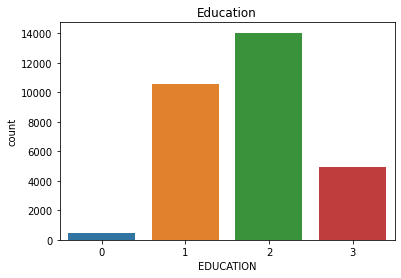

In [ ]:
sb.countplot(dataset['EDUCATION'])
plt.title("Education")
plt.show

From the above data we can conclude that Education in 
1. University by 14,030 people

2. graduate school by 10,585 people

3. graduate school by 4917 people

4. other studying by 468 people

**MARRIAGE**

Married = 1

Singles = 2

others = 3


In [ ]:
dataset['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In our data describe about married persons represented with 1, singles represented with 2, others represented with 3, but out dataset include "0" but it tells about anything so we simply move to others category

In [ ]:
dataset['MARRIAGE']=dataset['MARRIAGE'].replace({0:3})

In [ ]:
dataset['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

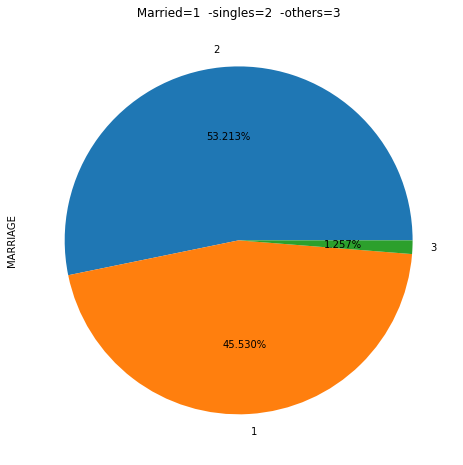

In [ ]:
dataset['MARRIAGE'].value_counts().plot(kind="pie",autopct='%1.3f%%',figsize=(8,8))
plt.title(" Married=1  -singles=2  -others=3 ")
plt.show()

From the above pie chart we can say that

1. married people were 45.53%

2.singles were 53.213%

3.others were 1.257%

**AGE**


In [ ]:
dataset['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

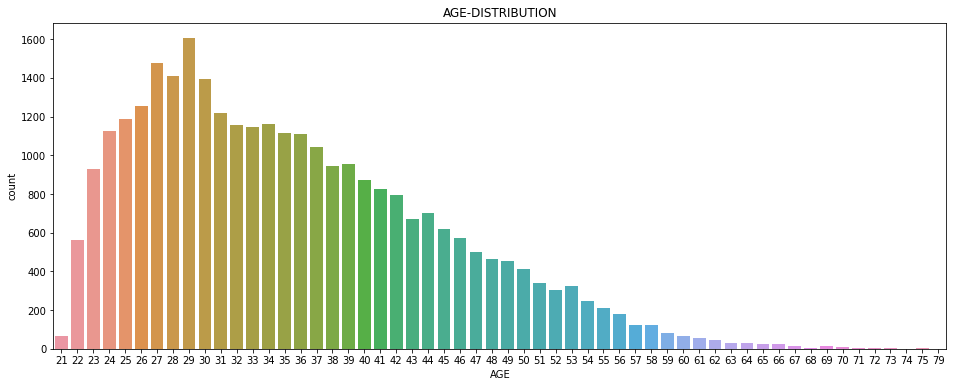

In [ ]:
plt.figure(figsize=(16,6))
sb.countplot(dataset['AGE'])
plt.title("AGE-DISTRIBUTION")
plt.show()


From the above data we can conclude that 
1.most of credit cardholders AGE was 25-45 and above age 60 people are used rarely creditcards

2.most of 29th age people used huge credit cards that number is 1605 and second place was 27th age people it's number  1477



In [ ]:
# renameing column Names


dataset.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
dataset.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
dataset.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
len(dataset[dataset.duplicated()])

0

we don't have any doplicates in our dataset

**Bill AMOUNT**

In [ ]:

print(dataset['BILL_AMT_APR'].value_counts())
print("\n")
print("\n")


print(dataset['BILL_AMT_MAY'].value_counts())
print("\n")
print("\n")

print(dataset['BILL_AMT_JUN'].value_counts())
print("\n")
print("\n")

print(dataset['BILL_AMT_JUL'].value_counts())
print("\n")
print("\n")

print(dataset['BILL_AMT_AUG'].value_counts())
print("\n")
print("\n")

print(dataset['BILL_AMT_SEPT'].value_counts())

0         4020
390        207
780         86
150         78
316         77
          ... 
26852        1
108660       1
480          1
15298        1
15313        1
Name: BILL_AMT_APR, Length: 20604, dtype: int64




0        3506
390       235
780        94
316        79
326        62
         ... 
19341       1
66726       1
80682       1
28508       1
32428       1
Name: BILL_AMT_MAY, Length: 21010, dtype: int64




0         3195
390        246
780        101
316         68
326         62
          ... 
97189        1
118839       1
23567        1
18377        1
36535        1
Name: BILL_AMT_JUN, Length: 21548, dtype: int64




0         2870
390        275
780         74
326         63
316         62
          ... 
19580        1
45129        1
227807       1
39330        1
49764        1
Name: BILL_AMT_JUL, Length: 22026, dtype: int64




0        2506
390       231
326        75
780        75
316        72
         ... 
26357       1
85195       1
6889        1
11004       1
489

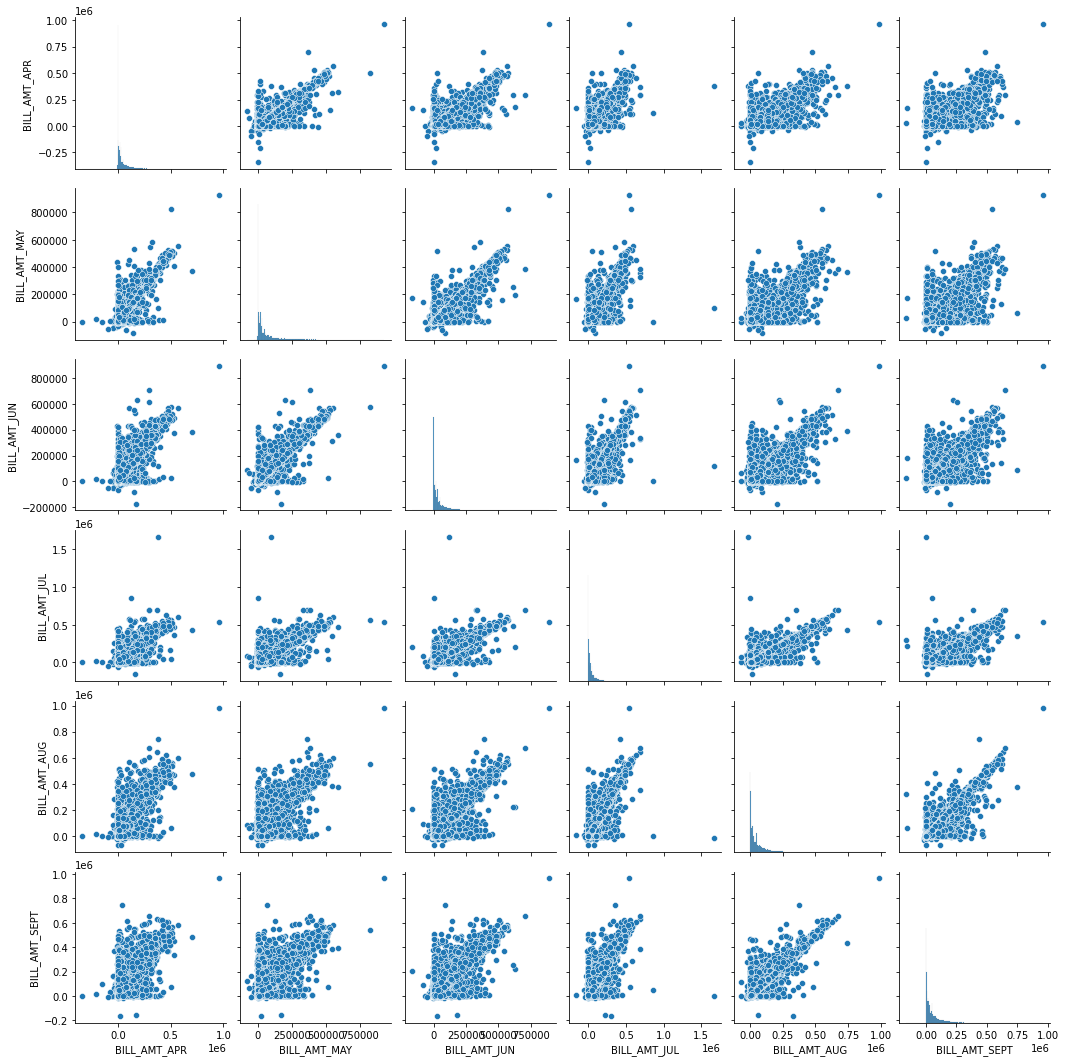

In [ ]:


bill_amount=dataset[['BILL_AMT_APR',  'BILL_AMT_MAY',   'BILL_AMT_JUN',   'BILL_AMT_JUL',   'BILL_AMT_AUG',   'BILL_AMT_SEPT']]

sb.pairplot(data=bill_amount)
plt.show()

The above pairplot shows that distribution of bill amount statements for each month explicitly for defaulters and non-defaulters

**Previous payments**

In [ ]:

dataset.groupby(['PAY_SEPT','Defaulter']).size() 

PAY_SEPT  Defaulter
-2        0             2394
          1              365
-1        0             4732
          1              954
 0        0            12849
          1             1888
 1        0             2436
          1             1252
 2        0              823
          1             1844
 3        0               78
          1              244
 4        0               24
          1               52
 5        0               13
          1               13
 6        0                5
          1                6
 7        0                2
          1                7
 8        0                8
          1               11
dtype: int64

In [ ]:
dataset.groupby(['PAY_AUG','Defaulter']).size() 

PAY_AUG  Defaulter
-2       0             3091
         1              691
-1       0             5084
         1              966
 0       0            13227
         1             2503
 1       0               23
         1                5
 2       0             1743
         1             2184
 3       0              125
         1              201
 4       0               49
         1               50
 5       0               10
         1               15
 6       0                3
         1                9
 7       0                8
         1               12
 8       0                1
dtype: int64

In [ ]:
dataset.groupby(['PAY_JUL','Defaulter']).size() 

PAY_JUL  Defaulter
-2       0             3328
         1              757
-1       0             5012
         1              926
 0       0            13013
         1             2751
 1       0                3
         1                1
 2       0             1850
         1             1969
 3       0              102
         1              138
 4       0               32
         1               44
 5       0                9
         1               12
 6       0                9
         1               14
 7       0                5
         1               22
 8       0                1
         1                2
dtype: int64

In [ ]:
dataset.groupby(['PAY_JUN','Defaulter']).size() 

PAY_JUN  Defaulter
-2       0             3511
         1              837
-1       0             4783
         1              904
 0       0            13439
         1             3016
 1       0                1
         1                1
 2       0             1506
         1             1653
 3       0               70
         1              110
 4       0               23
         1               46
 5       0               17
         1               18
 6       0                3
         1                2
 7       0               10
         1               48
 8       0                1
         1                1
dtype: int64

In [ ]:
dataset.groupby(['PAY_MAY','Defaulter']).size() 

PAY_MAY  Defaulter
-2       0             3651
         1              895
-1       0             4642
         1              897
 0       0            13752
         1             3195
 2       0             1203
         1             1423
 3       0               65
         1              113
 4       0               33
         1               51
 5       0                7
         1               10
 6       0                1
         1                3
 7       0               10
         1               48
 8       1                1
dtype: int64

In [ ]:
dataset.groupby(['PAY_APR','Defaulter']).size() 

PAY_APR  Defaulter
-2       0             3914
         1              981
-1       0             4765
         1              975
 0       0            13217
         1             3069
 2       0             1365
         1             1401
 3       0               66
         1              118
 4       0               18
         1               31
 5       0                6
         1                7
 6       0                5
         1               14
 7       0                8
         1               38
 8       1                2
dtype: int64

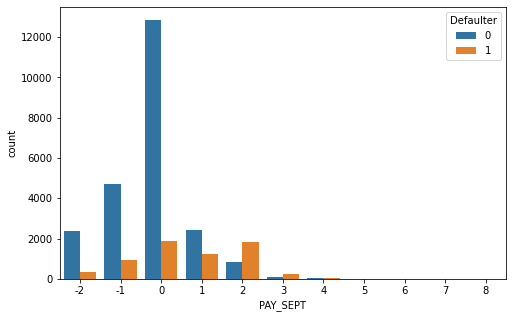

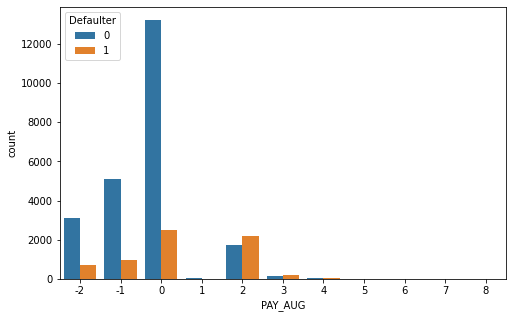

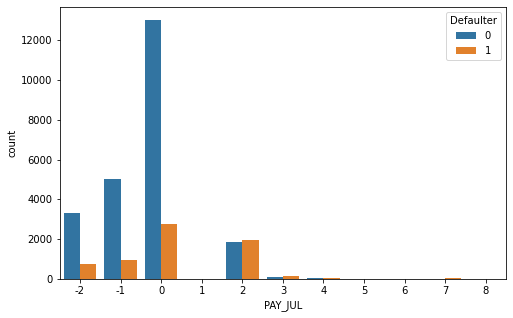

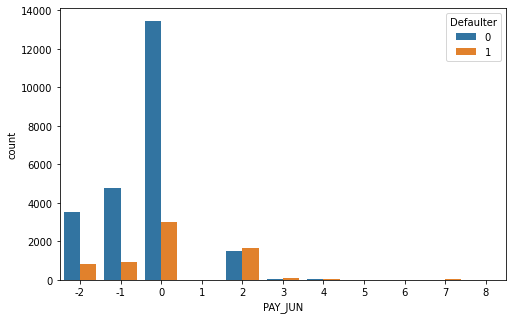

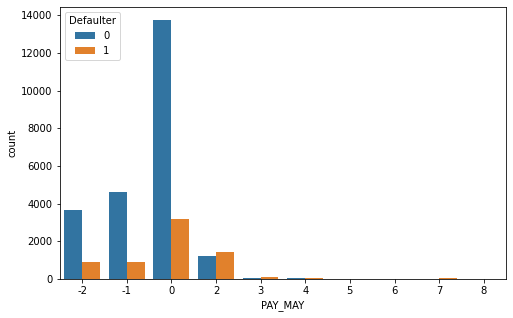

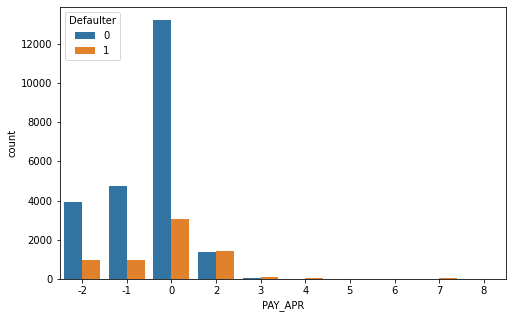

In [ ]:
payment=["PAY_SEPT",   "PAY_AUG", "PAY_JUL",  "PAY_JUN",  "PAY_MAY",  "PAY_APR"]

for col in payment:
  plt.figure(figsize=(8,5))
  sb.countplot(x=col, hue="Defaulter" , data= dataset)

From the above data we can conclude that

**PAY_SEPT**:
1. In the payment of september month single rupee not recieve from
Non-defaulters were 2394 persons, and from defaulters were 365 persons
2. Full amount received from Non-defaulters were 4732 persons and defaulters were 954 persons
3. Minmum amount recevied from Non- defaulters were 12,849 persons and Defaulters were 1888 persons

**PAY_AUG**:
1. In the payment of september month single rupee not recieve from
Non-defaulters were 3,091 persons, and from defaulters were 691 persons
2. Full amount received from Non-defaulters were 5,084 persons and defaulters were 966 persons
3. Minmum amount recevied from Non- defaulters were 13,227 persons and Defaulters were 2,503 persons

**PAY_JUL**
1. In the payment of september month single rupee not recieve from
Non-defaulters were 3328 persons, and from defaulters were 757 persons
2. Full amount received from Non-defaulters were 5012 persons and defaulters were 926 persons
3. Minmum amount recevied from Non- defaulters were 13,013 persons and Defaulters were 2,751 persons

**PAY_JUN**
1. In the payment of september month single rupee not recieve from
Non-defaulters were 3,511 persons, and from defaulters were 837persons
2. Full amount received from Non-defaulters were 4,783 persons and defaulters were 904 persons
3. Minmum amount recevied from Non- defaulters were 13,439persons and Defaulters were 3,016persons

**PAY_MAY**
1. In the payment of september month single rupee not recieve from
Non-defaulters were 3,651persons, and from defaulters were 895persons
2. Full amount received from Non-defaulters were 4,642 persons and defaulters were 897 persons
3. Minmum amount recevied from Non- defaulters were 13,752persons and Defaulters were 3,195persons

**PAY_APR**
1. In the payment of september month single rupee not recieve from
Non-defaulters were 3,914persons, and from defaulters were 981persons
2. Full amount received from Non-defaulters were 4,765 persons and defaulters were 975 persons
3. Minmum amount recevied from Non- defaulters were 13,217persons and Defaulters were 3,069persons

 **COMMON POINT**
 Representing  others numbers like 1,2,3,4,5,6,7,8 Delaying payment in months

**The distribution of amount of previous payment for each month.**

In [ ]:
pay_amount = dataset[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR']]

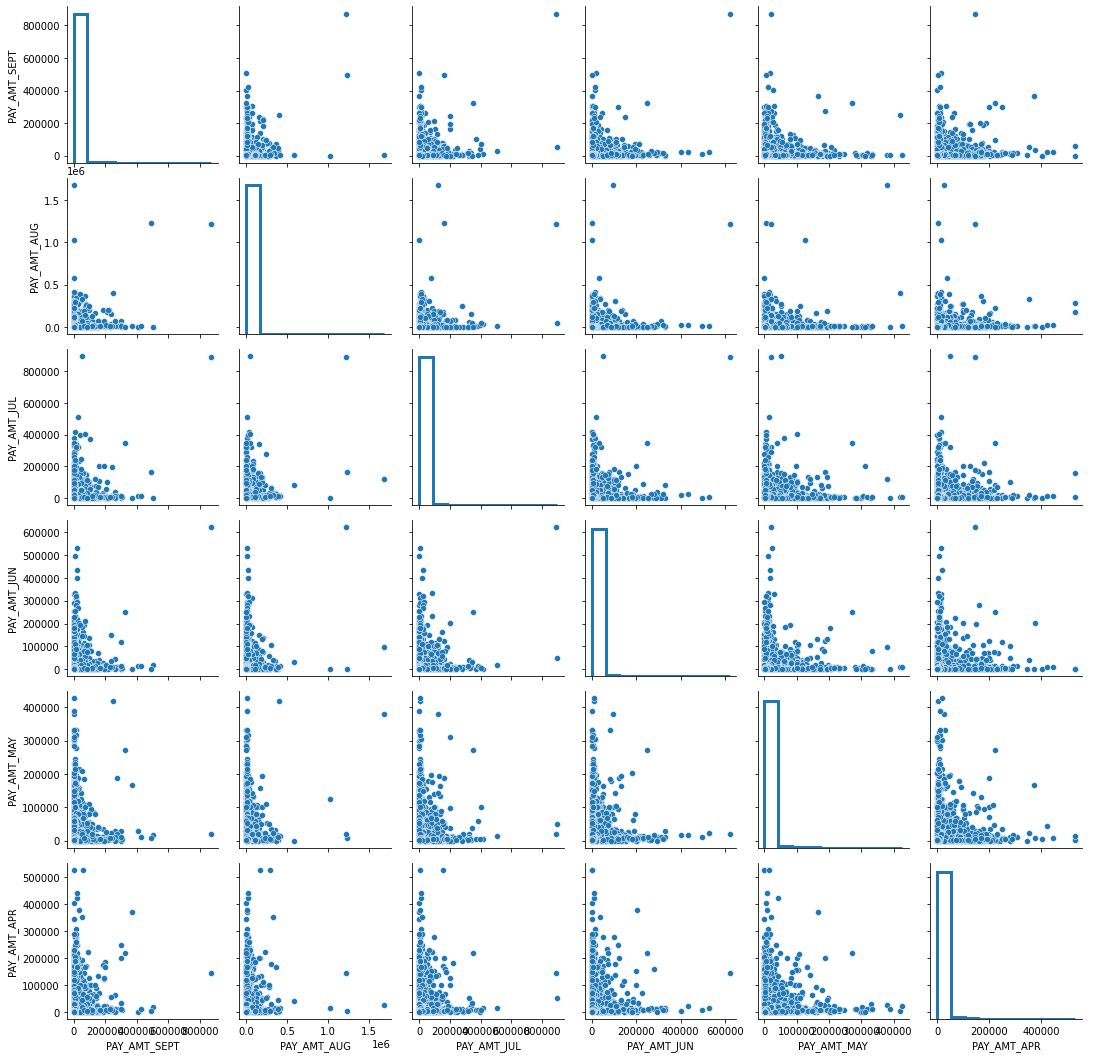

In [ ]:
g=sb.PairGrid(pay_amount  ,palette="bright")
g.map_upper(sb.scatterplot)
g.map_lower(sb.scatterplot)
g.map_diag(plt.hist, histtype="step",linewidth=3)
g.add_legend()

From the pairplot said that each month of the payment states Defaulers and Non-defaulters

**Bivariate analysis**

**Defaulters vs sex**

In [ ]:
dataset.groupby(['SEX','Defaulter']).size() 

SEX  Defaulter
1    0             9015
     1             2873
2    0            14349
     1             3763
dtype: int64

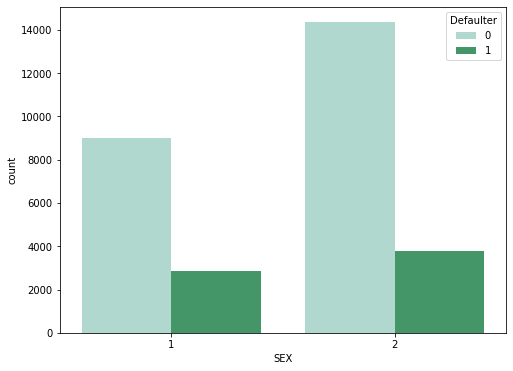

In [ ]:
plt.figure(figsize=(8,6))
sb.countplot(x='SEX',hue='Defaulter',data=dataset,palette='BuGn')
plt.show()

From the above figure we can conclude that defaultres were females, their number was 3763  and Height Non- defaultrs also famales it's number 14,349



**EDUCATION VS Defaulters**

In [ ]:
dataset.groupby(['EDUCATION','Defaulter']).size() 

EDUCATION  Defaulter
0          0              435
           1               33
1          0             8549
           1             2036
2          0            10700
           1             3330
3          0             3680
           1             1237
dtype: int64

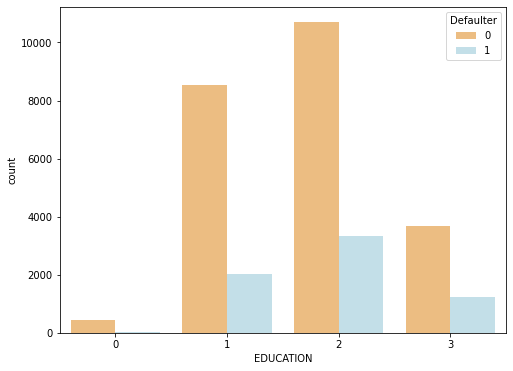

In [ ]:
plt.figure(figsize=(8,6))
sb.countplot(x='EDUCATION',hue='Defaulter',data=dataset,palette='RdYlBu')
plt.show()

From the above data we can conclude that most of the defaulters who did study in University people its number was 3,330 and after that graduate school people are defaulter their number was 2036 

**MARRIAGE PEOPLE VS Defaulter**

In [ ]:
dataset.groupby(['MARRIAGE','Defaulter']).size() 

MARRIAGE  Defaulter
1         0            10453
          1             3206
2         0            12623
          1             3341
3         0              288
          1               89
dtype: int64

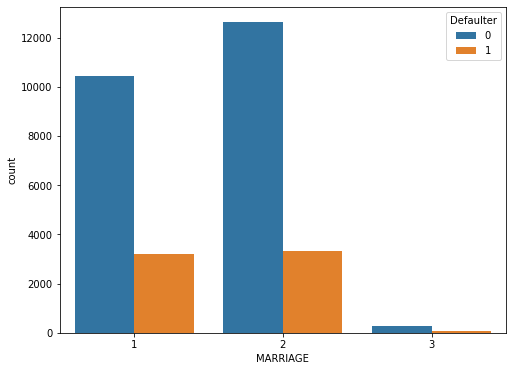

In [ ]:
plt.figure(figsize=(8,6))
sb.countplot(x='MARRIAGE',hue='Defaulter',data=dataset)
plt.show()

From the above data we can conclude that most of the defaulters were singles their numbers was 3341 and defaulters in married people were 3206 and defaulters in others were 89

**AGE VS Defaulter**

In [ ]:

dataset.groupby(['AGE','Defaulter']).size() 


AGE  Defaulter
21   0             53
     1             14
22   0            391
     1            169
23   0            684
                 ... 
73   1              3
74   0              1
75   0              2
     1              1
79   0              1
Length: 109, dtype: int64

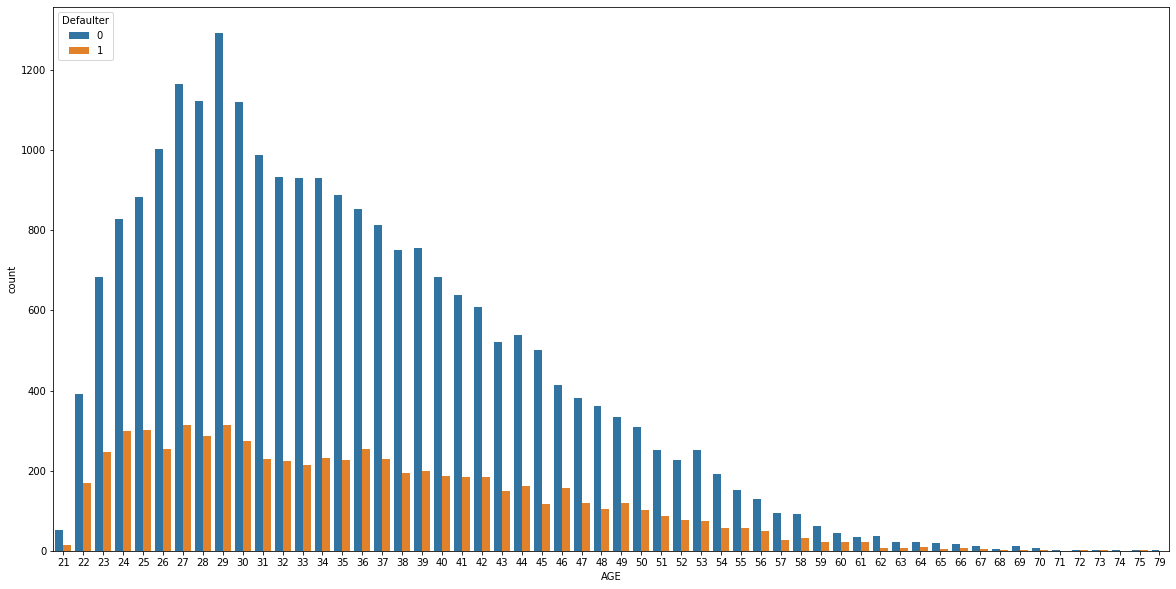

In [ ]:
plt.figure(figsize=(20,10))
sb.countplot(x='AGE',hue='Defaulter',data=dataset)
plt.show()

From the above data we can conclude that

1.most of the 27th age people defaulters 

2.least defaulters were above 60age people were defaulters

In [ ]:
dataset.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1


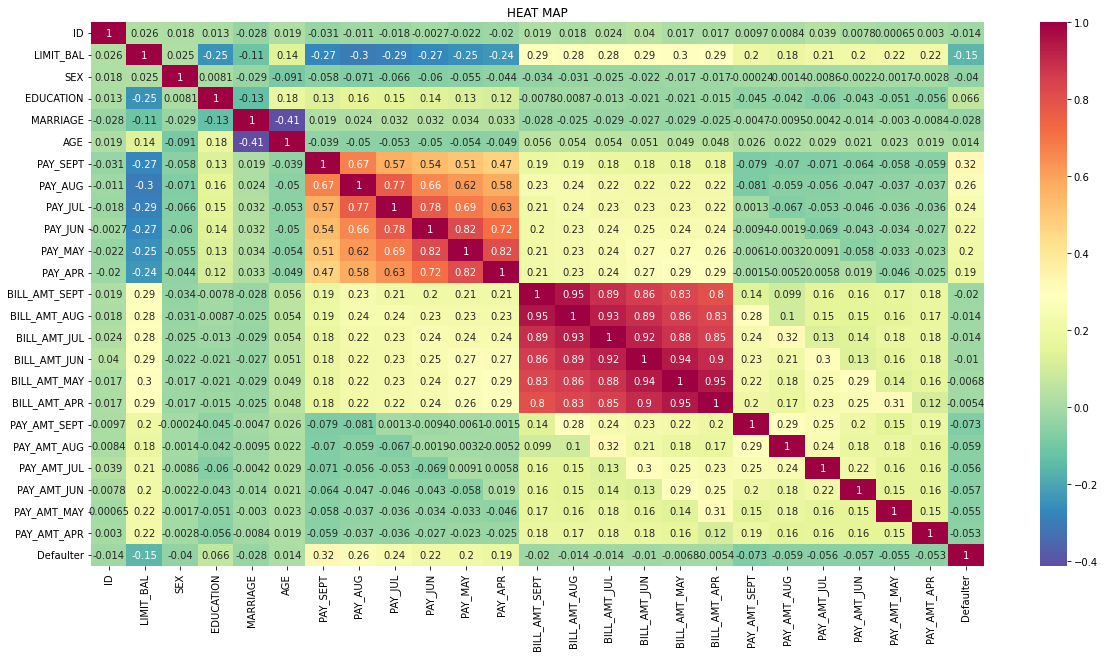

In [ ]:
plt.figure (figsize= (20,10))
corelation= dataset.corr()
sb.heatmap(corelation, annot=True, cmap='Spectral_r')
plt.title("HEAT MAP")
plt.show()

From the above heatmap we can conclude that correlationship between anytwo columns ,some part of data having positive HIGHLY correlation , some part of data having negative correlation , some part of data shows zero correlation
AND those who are multicolinear are need to remove Highely correlated items "PAY_SEPT","BILL_AMT_SEPT","PAY_AMT_SEPT" removed

In [ ]:
# dropping unimportant column of ID
dataset.drop(['ID'], axis=1, inplace=True)

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# finding multicollinear and dropout that value
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ["BILL_AMT_SEPT","PAY_SEPT","PAY_AMT_SEPT"]]])

,variables,VIF
0,LIMIT_BAL,3.994108
1,SEX,9.123593
2,EDUCATION,7.302312
3,MARRIAGE,6.374531
4,AGE,11.344442
5,PAY_AUG,2.690207
6,PAY_JUL,3.683818
7,PAY_JUN,4.426731
8,PAY_MAY,4.983557
9,PAY_APR,3.459377


Highely correlated  items "PAY_SEPT","BILL_AMT_SEPT","PAY_AMT_SEPT" removed

In [ ]:
dataset['Payement_Value'] = dataset['PAY_SEPT'] + dataset['PAY_AUG'] + dataset['PAY_JUL'] + dataset['PAY_JUN'] + dataset['PAY_MAY'] + dataset['PAY_APR']

In [ ]:
dataset.drop(["PAY_SEPT","BILL_AMT_SEPT","PAY_AMT_SEPT" ],axis=1,inplace=True)

In [ ]:
dataset['Defaulter'].value_counts()

0    23364
1     6636
Name: Defaulter, dtype: int64

Here dataset is imbalanced dataset so we need to do the balance using **SMOTE** 

In [ ]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter,Payement_Value
0,20000,2,2,1,24,2,-1,-1,-2,-2,3102,689,0,0,0,689,0,0,0,0,1,-2
1,120000,2,2,2,26,2,0,0,0,2,1725,2682,3272,3455,3261,1000,1000,1000,0,2000,1,3
2,90000,2,2,2,34,0,0,0,0,0,14027,13559,14331,14948,15549,1500,1000,1000,1000,5000,0,0
3,50000,2,2,1,37,0,0,0,0,0,48233,49291,28314,28959,29547,2019,1200,1100,1069,1000,0,0
4,50000,1,2,1,57,0,-1,0,0,0,5670,35835,20940,19146,19131,36681,10000,9000,689,679,0,-2


**Feature Engineering**

*ONE HOT ENCODING*

In [ ]:
dataset = pd.get_dummies(dataset,columns=['SEX','MARRIAGE',"EDUCATION"])

In [ ]:
dataset.head(1)


,LIMIT_BAL,AGE,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter,Payement_Value,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3
0,20000,24,2,-1,-1,-2,-2,3102,689,0,0,0,689,0,0,0,0,1,-2,0,1,1,0,0,0,0,1,0


In [ ]:
dataset.shape

(30000, 28)

In [ ]:
# creating dependent variable and independent variable
independendent_variable=dataset.drop(['Defaulter'],axis=1)

dependent_variable=dataset['Defaulter']

In [ ]:
X=independendent_variable
y=dependent_variable

In [ ]:
X.head()

,LIMIT_BAL,AGE,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Payement_Value,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3
0,20000,24,2,-1,-1,-2,-2,3102,689,0,0,0,689,0,0,0,0,-2,0,1,1,0,0,0,0,1,0
1,120000,26,2,0,0,0,2,1725,2682,3272,3455,3261,1000,1000,1000,0,2000,3,0,1,0,1,0,0,0,1,0
2,90000,34,0,0,0,0,0,14027,13559,14331,14948,15549,1500,1000,1000,1000,5000,0,0,1,0,1,0,0,0,1,0
3,50000,37,0,0,0,0,0,48233,49291,28314,28959,29547,2019,1200,1100,1069,1000,0,0,1,1,0,0,0,0,1,0
4,50000,57,0,-1,0,0,0,5670,35835,20940,19146,19131,36681,10000,9000,689,679,-2,1,0,1,0,0,0,0,1,0


In [ ]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Defaulter, Length: 30000, dtype: int64

In [ ]:
# spliting  unbalanced dataset  train and test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.20, random_state =17,stratify = y) 
print(X_train.shape)
print(X_test.shape)

(24000, 27)
(6000, 27)


**APPLYING SMOTE(Synthetic Minority Oversampling Technique)**

In [ ]:
from imblearn.over_sampling import SMOTE

smote= SMOTE()
X_train_sm,y_train_sm = smote.fit_resample(X,y)

from collections import Counter
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_sm))
Counter(y_train_sm)

Original dataset shape Counter({0: 18691, 1: 5309})
Resample dataset shape Counter({1: 23364, 0: 23364})


Counter({0: 23364, 1: 23364})

**Model evaluations**

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc,classification_report

In [ ]:
def print_metrics(actual, predicted):
  print('accuracy_score is {}'.format(accuracy_score(actual, predicted)))
  print(' precision_score is {}'.format( precision_score(actual, predicted)))
 
  print('recall_score is {}'.format(recall_score(actual, predicted)))
  print('f1_score is {}'.format(f1_score(actual, predicted)))
  print('roc_auc_score is {}'.format( roc_auc_score(actual , predicted)))
  print('confusion_matrix is {}'.format(confusion_matrix(actual , predicted)))
  print('classification_report is {}'.format(classification_report(actual , predicted)))


**Implementing logistic regression**

In [ ]:
# spiliting  balanced dataset as training and testing  after applying SMOTE
X_train_os, X_test_os, y_train_os, y_test_os= train_test_split(X_train_sm,y_train_sm, test_size = 0.20, random_state = 17,stratify = y_train_sm)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
lr= LogisticRegression()



In [ ]:
# fitting logistic regression
param_grid = {'penalty':['l1','l2'], 'C' : [100,150,200] }

log_model= GridSearchCV(lr, param_grid, scoring = 'accuracy', cv =5)
log_model.fit(X_train_os, y_train_os)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 150, 200], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
optimized_log=log_model.best_estimator_
optimized_log

LogisticRegression(C=150)

In [ ]:
log_model.best_params_

{'C': 150, 'penalty': 'l2'}

In [ ]:
log_model.best_score_

0.618238875301057

In [ ]:
# model score  on training data
print(f"training_model_score:  {log_model.score(X_train_os,y_train_os )}")

# model score on testing data
print(f"testing_model_score:  {log_model.score(X_test_os,y_test_os)}")

training_model_score:  0.6177572093520945
testing_model_score:  0.6196233682858977


In [ ]:
 # to predict the probability
y_train_pred = log_model.predict_proba(X_train_os)[:,1]
y_test_pred = log_model.predict_proba(X_test_os)[:,1]

In [ ]:
y_train_pred

array([0.46490546, 0.36523483, 0.14741404, ..., 0.42991732, 0.53500427,
       0.54379683])

In [ ]:
y_test_pred

array([0.45396323, 0.31676538, 0.33733908, ..., 0.55766331, 0.49614357,
       0.03336133])

Here the probability  said about the NON-Defaulter and defaulters 

In [ ]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds = log_model.predict(X_train_os)
y_test_class_preds = log_model.predict(X_test_os)

In [ ]:
y_test_class_preds

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_test

10867    0
14863    0
26562    0
14294    1
26330    0
        ..
19576    0
2473     0
10168    0
29686    0
12215    0
Name: Defaulter, Length: 6000, dtype: int64

In [ ]:
# Evaluation of training model
print_metrics(y_train_os,y_train_class_preds)



accuracy_score is 0.6177572093520945
 precision_score is 0.6144089822226843
recall_score is 0.6323899202824889
f1_score is 0.6232697935616546
roc_auc_score is 0.6177572093520945
confusion_matrix is [[11273  7418]
 [ 6871 11820]]
classification_report is               precision    recall  f1-score   support

           0       0.62      0.60      0.61     18691
           1       0.61      0.63      0.62     18691

    accuracy                           0.62     37382
   macro avg       0.62      0.62      0.62     37382
weighted avg       0.62      0.62      0.62     37382



[[11273  7418]
 [ 6871 11820]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

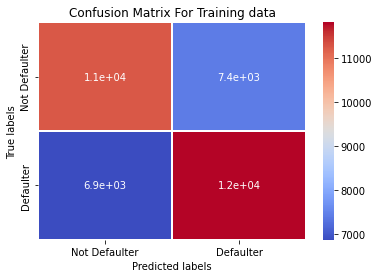

In [ ]:
# Get the confusion matrix for  training  data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train_os,y_train_class_preds)
print(cm)

ax= plt.subplot()
sb.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

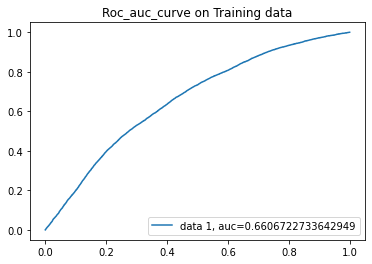

In [ ]:
# Roc_auc_curve
y_train_pred = log_model.predict_proba(X_train_os)[:,1]
fpr, tpr, _ = roc_curve(y_train_os,  y_train_pred )
auc = roc_auc_score(y_train_os,  y_train_pred  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
# Evaluation of testing model
print_metrics(y_test_os,y_test_class_preds)

accuracy_score is 0.6196233682858977
 precision_score is 0.6176346801346801
recall_score is 0.6280761823239889
f1_score is 0.6228116710875332
roc_auc_score is 0.6196233682858977
confusion_matrix is [[2856 1817]
 [1738 2935]]
classification_report is               precision    recall  f1-score   support

           0       0.62      0.61      0.62      4673
           1       0.62      0.63      0.62      4673

    accuracy                           0.62      9346
   macro avg       0.62      0.62      0.62      9346
weighted avg       0.62      0.62      0.62      9346



[[2856 1817]
 [1738 2935]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

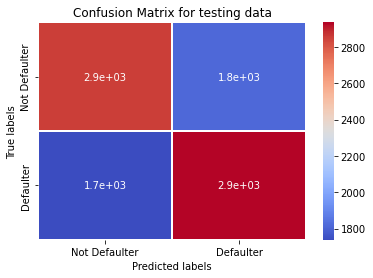

In [ ]:
# Get the confusion matrix for  testing data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test_os,y_test_class_preds)
print(cm)

ax= plt.subplot()
sb.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

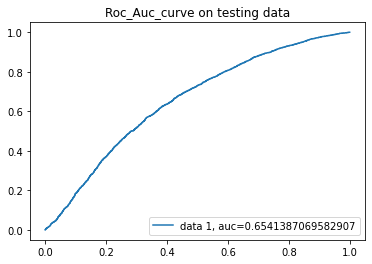

In [ ]:
# Roc_auc_curve
y_test_proba= log_model.predict_proba(X_test_os)[:,1]
fpr, tpr, _ = roc_curve(y_test_os,  y_test_proba )
auc = roc_auc_score(y_test_os, y_test_proba )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_Auc_curve on testing data")
plt.legend(loc=4)
plt.show()

We have implemented logistic regression and we getting accuracy_score is approx 62%. and precision score approx is 62% and f1_score is 62%and roc_auc approx is 62% As we have imbalanced dataset,  recall_score is approx 63%  better parameter. Let's go ahead with other models and see if they can give better result.

In [ ]:
##################################################################

Implementing **Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

In [ ]:
rf= RandomForestClassifier() 
grid_values = {'n_estimators':[50,60,70,80,90,100], 'max_depth':[3, 5, 7,9,11,14]}
rf_grid = GridSearchCV(rf, param_grid = grid_values, scoring = 'accuracy', cv=5)

# Fit the object to train dataset
rf_grid.fit(X_train_os, y_train_os)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 14],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='accuracy')

In [ ]:
rf_grid.best_params_

{'max_depth': 14, 'n_estimators': 60}

In [ ]:
optimized_rf=rf_grid.best_estimator_
optimized_rf

RandomForestClassifier(max_depth=14, n_estimators=60)

In [ ]:
rf_grid.best_score_

0.8614040181579137

In [ ]:
# model score  on training data
print(f"training_model_score:  {rf_grid.score(X_train_os,y_train_os )}")

# model score on testing data
print(f"testing_model_score:  {rf_grid.score(X_test_os,y_test_os)}")

training_model_score:  0.9318121020812156
testing_model_score:  0.8607960624866253


In [ ]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds_rf = rf_grid.predict(X_train_os)
y_test_class_preds_rf = rf_grid.predict(X_test_os)

In [ ]:
y_test_class_preds_rf

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
y_test

10867    0
14863    0
26562    0
14294    1
26330    0
        ..
19576    0
2473     0
10168    0
29686    0
12215    0
Name: Defaulter, Length: 6000, dtype: int64

In [ ]:
# Evaluation of training model
print_metrics(y_train_os,y_train_class_preds_rf)

accuracy_score is 0.9318121020812156
 precision_score is 0.9737614463489082
recall_score is 0.8875394574929111
f1_score is 0.9286533993898173
roc_auc_score is 0.9318121020812155
confusion_matrix is [[18244   447]
 [ 2102 16589]]
classification_report is               precision    recall  f1-score   support

           0       0.90      0.98      0.93     18691
           1       0.97      0.89      0.93     18691

    accuracy                           0.93     37382
   macro avg       0.94      0.93      0.93     37382
weighted avg       0.94      0.93      0.93     37382



[[18244   447]
 [ 2102 16589]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

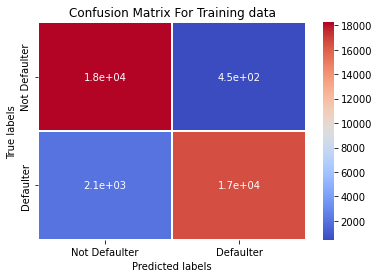

In [ ]:
# Get the confusion matrix for  training  data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train_os,y_train_class_preds_rf)
print(cm)

ax= plt.subplot()
sb.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

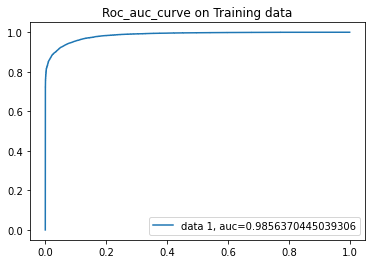

In [ ]:
# Roc_auc_curve
y_train_preds_proba_rf = rf_grid.predict_proba(X_train_os)[::,1]

fpr, tpr, _ = roc_curve(y_train_os,  y_train_preds_proba_rf )
auc = roc_auc_score(y_train_os,  y_train_preds_proba_rf  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
# Evaluation of testing model
print_metrics(y_test_os,y_test_class_preds_rf)

accuracy_score is 0.8607960624866253
 precision_score is 0.896519285042333
recall_score is 0.815750053498823
f1_score is 0.8542296918767507
roc_auc_score is 0.8607960624866253
confusion_matrix is [[4233  440]
 [ 861 3812]]
classification_report is               precision    recall  f1-score   support

           0       0.83      0.91      0.87      4673
           1       0.90      0.82      0.85      4673

    accuracy                           0.86      9346
   macro avg       0.86      0.86      0.86      9346
weighted avg       0.86      0.86      0.86      9346



[[4233  440]
 [ 861 3812]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

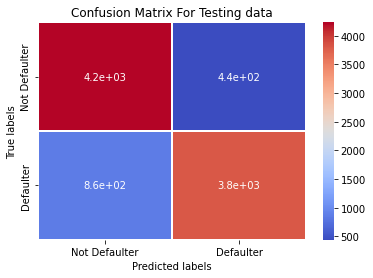

In [ ]:
# Get the confusion matrix for  testing data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test_os,y_test_class_preds_rf)
print(cm)

ax= plt.subplot()
sb.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

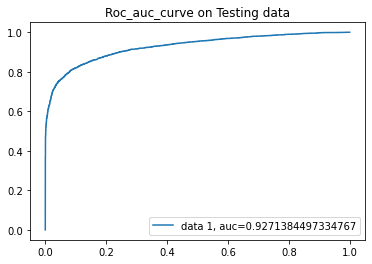

In [ ]:
# Roc_auc_curve
y_test_preds_proba_rf = rf_grid.predict_proba(X_test_os)[::,1]

fpr, tpr, _ = roc_curve(y_test_os,  y_test_preds_proba_rf )
auc = roc_auc_score(y_test_os,  y_test_preds_proba_rf  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

We have implemented Random Forest  and we getting accuracy_score is approx 86%. and recall_score is approx 82% and f1_score is 85% and ROC_AUC score is 86% ,precision score is approx 90% better parameter. Let's go ahead with other models and see if they can give better result.

In [ ]:
##################################################################################

**Implementing KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
#knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid, scoring = 'accuracy',cv=3)
knn_cv.fit(X_train_os,y_train_os)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20]},
             scoring='accuracy')

In [ ]:
knn_cv.best_score_

0.7067840748206636

In [ ]:
knn_cv.best_params_

{'n_neighbors': 5}

In [ ]:
optimized_knn=knn_cv.best_estimator_
optimized_knn

KNeighborsClassifier()

In [ ]:
# model score  on training data
print(f"training_model_score:  {knn_cv.score(X_train_os,y_train_os )}")

# model score on testing data
print(f"testing_model_score:  {knn_cv.score(X_test_os,y_test_os)}")

training_model_score:  0.8327804825852014
testing_model_score:  0.7472715600256794


In [ ]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds_knn = knn_cv.predict(X_train_os)
y_test_class_preds_knn = knn_cv.predict(X_test_os)

In [ ]:
y_test_class_preds_knn

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
y_test_os

38707    1
26884    1
19454    0
12363    0
4518     0
        ..
19740    0
35793    1
32857    1
17947    0
1027     0
Name: Defaulter, Length: 9346, dtype: int64

In [ ]:
# Evaluation of training model
print_metrics(y_train_os,y_train_class_preds_knn)


accuracy_score is 0.8327804825852014
 precision_score is 0.7761498845675724
recall_score is 0.9353164624685678
f1_score is 0.8483319179910227
roc_auc_score is 0.8327804825852015
confusion_matrix is [[13649  5042]
 [ 1209 17482]]
classification_report is               precision    recall  f1-score   support

           0       0.92      0.73      0.81     18691
           1       0.78      0.94      0.85     18691

    accuracy                           0.83     37382
   macro avg       0.85      0.83      0.83     37382
weighted avg       0.85      0.83      0.83     37382



[[13649  5042]
 [ 1209 17482]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

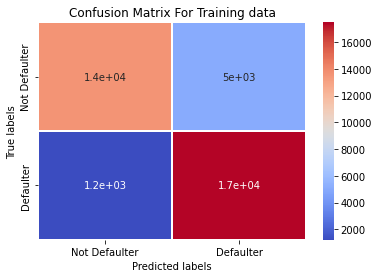

In [ ]:
# Get the confusion matrix for  training  data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train_os,y_train_class_preds_knn)
print(cm)

ax= plt.subplot()
sb.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

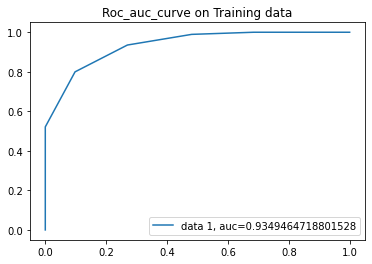

In [ ]:
# Roc_auc_curve on taining data
y_train_preds_proba_knn = knn_cv.predict_proba(X_train_os)[::,1]

fpr, tpr, _ = roc_curve(y_train_os,  y_train_preds_proba_knn )
auc = roc_auc_score(y_train_os,  y_train_preds_proba_knn )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
# Evaluation of testing model
print_metrics(y_test_os,y_test_class_preds_knn)

accuracy_score is 0.7472715600256794
 precision_score is 0.6969490369865349
recall_score is 0.8750267494115129
f1_score is 0.7759013282732449
roc_auc_score is 0.7472715600256794
confusion_matrix is [[2895 1778]
 [ 584 4089]]
classification_report is               precision    recall  f1-score   support

           0       0.83      0.62      0.71      4673
           1       0.70      0.88      0.78      4673

    accuracy                           0.75      9346
   macro avg       0.76      0.75      0.74      9346
weighted avg       0.76      0.75      0.74      9346



[[2895 1778]
 [ 584 4089]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

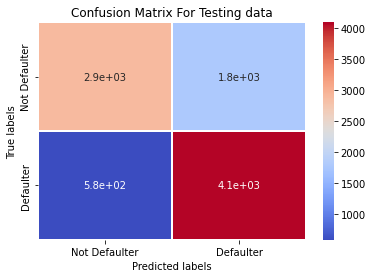

In [ ]:
# Get the confusion matrix for  testing data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test_os,y_test_class_preds_knn)
print(cm)

ax= plt.subplot()
sb.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

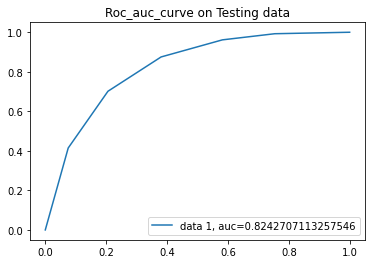

In [ ]:
# Roc_auc_curve testing data
y_test_preds_proba_knn = knn_cv.predict_proba(X_test_os)[::,1]

fpr, tpr, _ = roc_curve(y_test_os,  y_test_preds_proba_knn )
auc = roc_auc_score(y_test_os,  y_test_preds_proba_knn )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

We have implemented KNN  and we getting accuracy_score is approx 75%. and precision score  is approx 70% and f1_score is 76% and ROC_AUC score is 75% ,recall_score is approx 88% better parameter

 

In [ ]:
##################################################

**Implementing XG boost Algorithm**

In [ ]:
from xgboost import  XGBClassifier

In [ ]:
param_test1 = {
 'max_depth':range(2,3,6),
 'min_child_weight':range(1,2,6)}

In [ ]:
# xg boost with grid search cv
xgb_grid = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1 ,objective= 'binary:logistic'), 
 param_grid = param_test1, scoring='roc_auc', cv=3)

In [ ]:
xgb_grid.fit(X_train_os,y_train_os)

GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=5),
             param_grid={'max_depth': range(2, 3, 6),
                         'min_child_weight': range(1, 2, 6)},
             scoring='roc_auc')

In [ ]:
xgb_grid.best_params_

{'max_depth': 2, 'min_child_weight': 1}

In [ ]:

optimized_xgb=xgb_grid.best_estimator_
optimized_xgb

XGBClassifier(max_depth=2)

In [ ]:
xgb_grid.best_score_

0.9116187630168521

In [ ]:
# model score  on training data
print(f"training_model_score:  {xgb_grid.score(X_train_os,y_train_os )}")

# model score on testing data
print(f"testing_model_score:  {xgb_grid.score(X_test_os,y_test_os)}")

training_model_score:  0.9131000100153575
testing_model_score:  0.9096679299548027


In [ ]:
# Get the predicted classes
y_train_class_preds_xgb = xgb_grid.predict(X_train_os)
y_test_class_preds_xgb = xgb_grid.predict(X_test_os)

In [ ]:
y_test_class_preds_xgb

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_test_os

38707    1
26884    1
19454    0
12363    0
4518     0
        ..
19740    0
35793    1
32857    1
17947    0
1027     0
Name: Defaulter, Length: 9346, dtype: int64

In [ ]:
# Evaluation of training model
print_metrics(y_train_os,y_train_class_preds_xgb)

accuracy_score is 0.844818361778396
 precision_score is 0.8935637518319492
recall_score is 0.7828901610400728
f1_score is 0.8345738158382526
roc_auc_score is 0.8448183617783961
confusion_matrix is [[16948  1743]
 [ 4058 14633]]
classification_report is               precision    recall  f1-score   support

           0       0.81      0.91      0.85     18691
           1       0.89      0.78      0.83     18691

    accuracy                           0.84     37382
   macro avg       0.85      0.84      0.84     37382
weighted avg       0.85      0.84      0.84     37382



[[16948  1743]
 [ 4058 14633]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

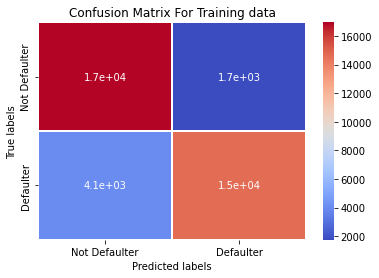

In [ ]:
# Get the confusion matrix for  training  data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train_os,y_train_class_preds_xgb)
print(cm)

ax= plt.subplot()
sb.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

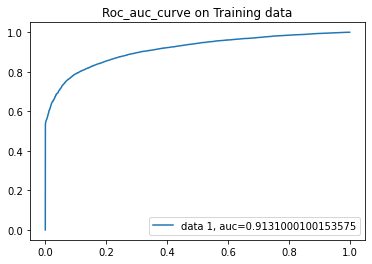

In [ ]:
# Roc_auc_curve on taining data
y_train_preds_proba_xgb = xgb_grid.predict_proba(X_train_os)[::,1]

fpr, tpr, _ = roc_curve(y_train_os,  y_train_preds_proba_xgb )
auc = roc_auc_score(y_train_os,  y_train_preds_proba_xgb )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
# Evaluation of testing model
print_metrics(y_test_os,y_test_class_preds_xgb)

accuracy_score is 0.8400385191525787
 precision_score is 0.8864299610894941
recall_score is 0.7800128397175262
f1_score is 0.829823562891292
roc_auc_score is 0.8400385191525788
confusion_matrix is [[4206  467]
 [1028 3645]]
classification_report is               precision    recall  f1-score   support

           0       0.80      0.90      0.85      4673
           1       0.89      0.78      0.83      4673

    accuracy                           0.84      9346
   macro avg       0.85      0.84      0.84      9346
weighted avg       0.85      0.84      0.84      9346



[[4206  467]
 [1028 3645]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

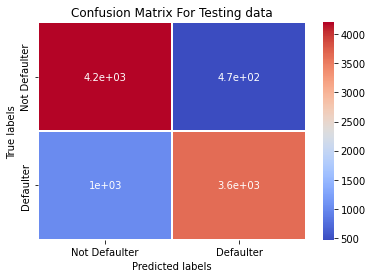

In [ ]:
# Get the confusion matrix for  testing data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test_os,y_test_class_preds_xgb)
print(cm)

ax= plt.subplot()
sb.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

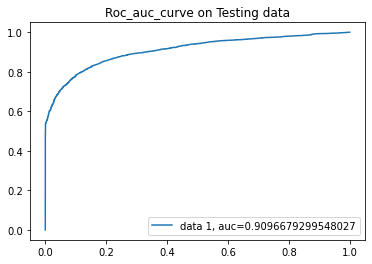

In [ ]:
# Roc_auc_curve testing data
y_test_preds_proba_xgb = xgb_grid.predict_proba(X_test_os)[::,1]

fpr, tpr, _ = roc_curve(y_test_os,  y_test_preds_proba_xgb)
auc = roc_auc_score(y_test_os,  y_test_preds_proba_xgb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

We have implemented XGBOOST WITH GRID SEARCH CV and we getting accuracy_score is approx 84%. and recall_score is approx 78% and f1_score is 83% and ROC_AUC score is 84% ,precision score is approx 89% better parameter 

**Model Summary For Train data**

In [ ]:
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"MODEL_NAME", "Train accuracy_score ", "Train Precision_score", "Train Recall_score","Train f1_score",'Train ROC_AUC_Score'])
train.add_row(['1','Logistic Regression','0.6177572093520945','0.6144089822226843',' 0.6323899202824889','0.6232697935616546'," 0.6177572093520945"])
train.add_row(['2','Random_Forest_classifier',' 0.9318121020812156','0.9737614463489082','0.8875394574929111','0.9286533993898173'," 0.9318121020812155"])
train.add_row(['3','KNN_Classifier ','0.8327804825852014','0.7761498845675724','0.9353164624685678','0.8483319179910227',"0.8327804825852015"])
train.add_row(['4','XGBoost_Classifier','0.844818361778396','0.8935637518319492','0.7828901610400728','0.8345738158382526'," 0.8448183617783961"])

print(train)

+-------+--------------------------+-----------------------+-----------------------+---------------------+--------------------+---------------------+
| SL NO |        MODEL_NAME        | Train accuracy_score  | Train Precision_score |  Train Recall_score |   Train f1_score   | Train ROC_AUC_Score |
+-------+--------------------------+-----------------------+-----------------------+---------------------+--------------------+---------------------+
|   1   |   Logistic Regression    |   0.6177572093520945  |   0.6144089822226843  |  0.6323899202824889 | 0.6232697935616546 |  0.6177572093520945 |
|   2   | Random_Forest_classifier |   0.9318121020812156  |   0.9737614463489082  |  0.8875394574929111 | 0.9286533993898173 |  0.9318121020812155 |
|   3   |     KNN_Classifier       |   0.8327804825852014  |   0.7761498845675724  |  0.9353164624685678 | 0.8483319179910227 |  0.8327804825852015 |
|   4   |    XGBoost_Classifier    |   0.844818361778396   |   0.8935637518319492  |  0.782890161040

**MOdel summary for Test data**

In [ ]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Test accuracy_score  ", "Test Precision_score","Test Recall_score","Test f1_score",'Test ROC_AUC_Score'])
test.add_row(['1','Logistic Regression','0.6196233682858977','0.6176346801346801','0.6280761823239889','0.6228116710875332',"0.6196233682858977"])
test.add_row(['2','Random_Forest_classifier','0.8607960624866253',' 0.896519285042333','0.815750053498823','0.8542296918767507',"0.8607960624866253"])
test.add_row(['3','KNN_Classifier ',' 0.7472715600256794','0.6969490369865349','0.8750267494115129','0.7759013282732449',"0.7472715600256794"])
test.add_row(['4','XGBOOST_Classifier',' 0.8400385191525787',' 0.8864299610894941','0.7800128397175262','0.829823562891292',"0.8400385191525788"])

print(test)

+-------+--------------------------+-----------------------+----------------------+--------------------+--------------------+--------------------+
| SL NO |        MODEL_NAME        | Test accuracy_score   | Test Precision_score | Test Recall_score  |   Test f1_score    | Test ROC_AUC_Score |
+-------+--------------------------+-----------------------+----------------------+--------------------+--------------------+--------------------+
|   1   |   Logistic Regression    |   0.6196233682858977  |  0.6176346801346801  | 0.6280761823239889 | 0.6228116710875332 | 0.6196233682858977 |
|   2   | Random_Forest_classifier |   0.8607960624866253  |   0.896519285042333  | 0.815750053498823  | 0.8542296918767507 | 0.8607960624866253 |
|   3   |     KNN_Classifier       |   0.7472715600256794  |  0.6969490369865349  | 0.8750267494115129 | 0.7759013282732449 | 0.7472715600256794 |
|   4   |    XGBOOST_Classifier    |   0.8400385191525787  |  0.8864299610894941  | 0.7800128397175262 | 0.82982356289

**Conclusion**
 We used diffent type of Classification  algorithms to train our model like, Logistic Regression,  Random Forest Classifier,KNN_Classifier, XGboost_Classifier. and Also we tuned the parameters of Random forest classifier and XGboost classifier ,KNN_  Out of them Random forest classifier ( tuned hyperparameters gave) the best result.
 it's Highest
  
 Precision score is approx 90%,
 
 Recall score is approx 82%
 

ROC_Auc score is approx 86%,

and Accuracy_score is  approx 86%,

and It's F1_score approx is 85% 